In [40]:
import pandas as pd


df = pd.read_csv('data/train.csv').drop('id', axis=1)

In [41]:
categorical_cols = ['Name', 'Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numerical_cols = df.columns.difference(categorical_cols + ['Depression'])

In [42]:
df[categorical_cols].head()

,Name,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,Aaradhya,Female,Ludhiana,Working Professional,Chef,More than 8 hours,Healthy,BHM,No,No
1,Vivan,Male,Varanasi,Working Professional,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,No
2,Yuvraj,Male,Visakhapatnam,Student,NaN,5-6 hours,Healthy,B.Pharm,Yes,No
3,Yuvraj,Male,Mumbai,Working Professional,Teacher,Less than 5 hours,Moderate,BBA,Yes,Yes
4,Rhea,Female,Kanpur,Working Professional,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,Yes


In [19]:
df[numerical_cols].head()

,Academic Pressure,Age,CGPA,Financial Stress,Job Satisfaction,Study Satisfaction,Work Pressure,Work/Study Hours
0,NaN,49.0,NaN,2.0,2.0,NaN,5.0,1.0
1,NaN,26.0,NaN,3.0,3.0,NaN,4.0,7.0
2,5.0,33.0,8.97,1.0,NaN,2.0,NaN,3.0
3,NaN,22.0,NaN,1.0,1.0,NaN,5.0,10.0
4,NaN,30.0,NaN,4.0,1.0,NaN,1.0,9.0


In [20]:
# fill numerical columns with 0
df[numerical_cols] = df[numerical_cols].fillna(0)

# Handle categorical columns

## Name

In [23]:
df['Name'].unique()

array(['Aaradhya', 'Vivan', 'Yuvraj', 'Rhea', 'Vani', 'Ritvik', 'Rajveer',
       'Aishwarya', 'Simran', 'Utkarsh', 'Aahana', 'Tejas', 'Aadhya',
       'Kiran', 'Aditi', 'Suhani', 'Jiya', 'Bhavesh', 'Armaan', 'Ishaani',
       'Prachi', 'Pratyush', 'Abhinav', 'Siddhesh', 'Aditya', 'Aarav',
       'Asha', 'Kashish', 'Prisha', 'Chhavi', 'Tanmay', 'Vihaan', 'Shiv',
       'Anvi', 'Darsh', 'Samar', 'Raunak', 'Mahi', 'Shaurya', 'Vidya',
       'Jai', 'Ayush', 'Ansh', 'Anand', 'Yashvi', 'Shrey', 'Ritika',
       'Mihir', 'Isha', 'Arjun', 'Rohan', 'Pratham', 'Nirvaan', 'Ishaan',
       'Aarya', 'Riya', 'Aariv', 'Raghavendra', 'Mahika', 'Abhishek',
       'Harshil', 'Janvi', 'Kartikeya', 'Shivam', 'Advait', 'Reyansh',
       'Saanvi', 'Ivaan', 'Pallavi', 'Sneha', 'Ayaan', 'Aakash', 'Raghav',
       'Satyam', 'Aarush', 'Vibha', 'Rupal', 'Sanya', 'Mira', 'Rashi',
       'Shlok', 'Harsha', 'Divya', 'Pranav', 'Hrithik', 'Tushar',
       'Garima', 'Zoya', 'Kian', 'Navya', 'Lakshay', 'Kriti', 'Palak

Name likely won't contribute to depression so we can drop it.

In [24]:
df = df.drop('Name', axis=1)

## Gender

In [25]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

## City

In [26]:
df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Bhavna',
       'Less Delhi', 'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush',
       'City', '3.0', 'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay',
       'Morena', 'Ishkarsh', 'Kashk', 'Mihir', 'Vidya', 'Tolkata', 'Anvi',
       'Krinda', 'Ayansh', 'Shrey', 'Ivaan', 'Vaanya', 'Gaurav', 'Harsh',
       'Reyansh', 'Kashish', 'Kibara', 'Vaishnavi', 'Chhavi', 'Parth',
       'Mahi', 'Tushar', 'MSc', 'No', 'Rashi', 'ME', 'Molkata',
       'Researcher', '

There seems to be a lot of values that are not city names.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, col):
    # Get the value counts of cities
    city_counts = df[col].value_counts()

    # Set up the plot style and size
    plt.figure(figsize=(15, 10))
    sns.set(style="whitegrid")

    # Create the bar plot
    ax = sns.barplot(x=city_counts.index, y=city_counts.values)

    # Customize the plot
    plt.title(f'Distribution of {col}', fontsize=20)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90, ha='right')

    # Add value labels on top of each bar
    for i, v in enumerate(city_counts.values):
        ax.text(i, v, str(v), ha='center', va='bottom')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

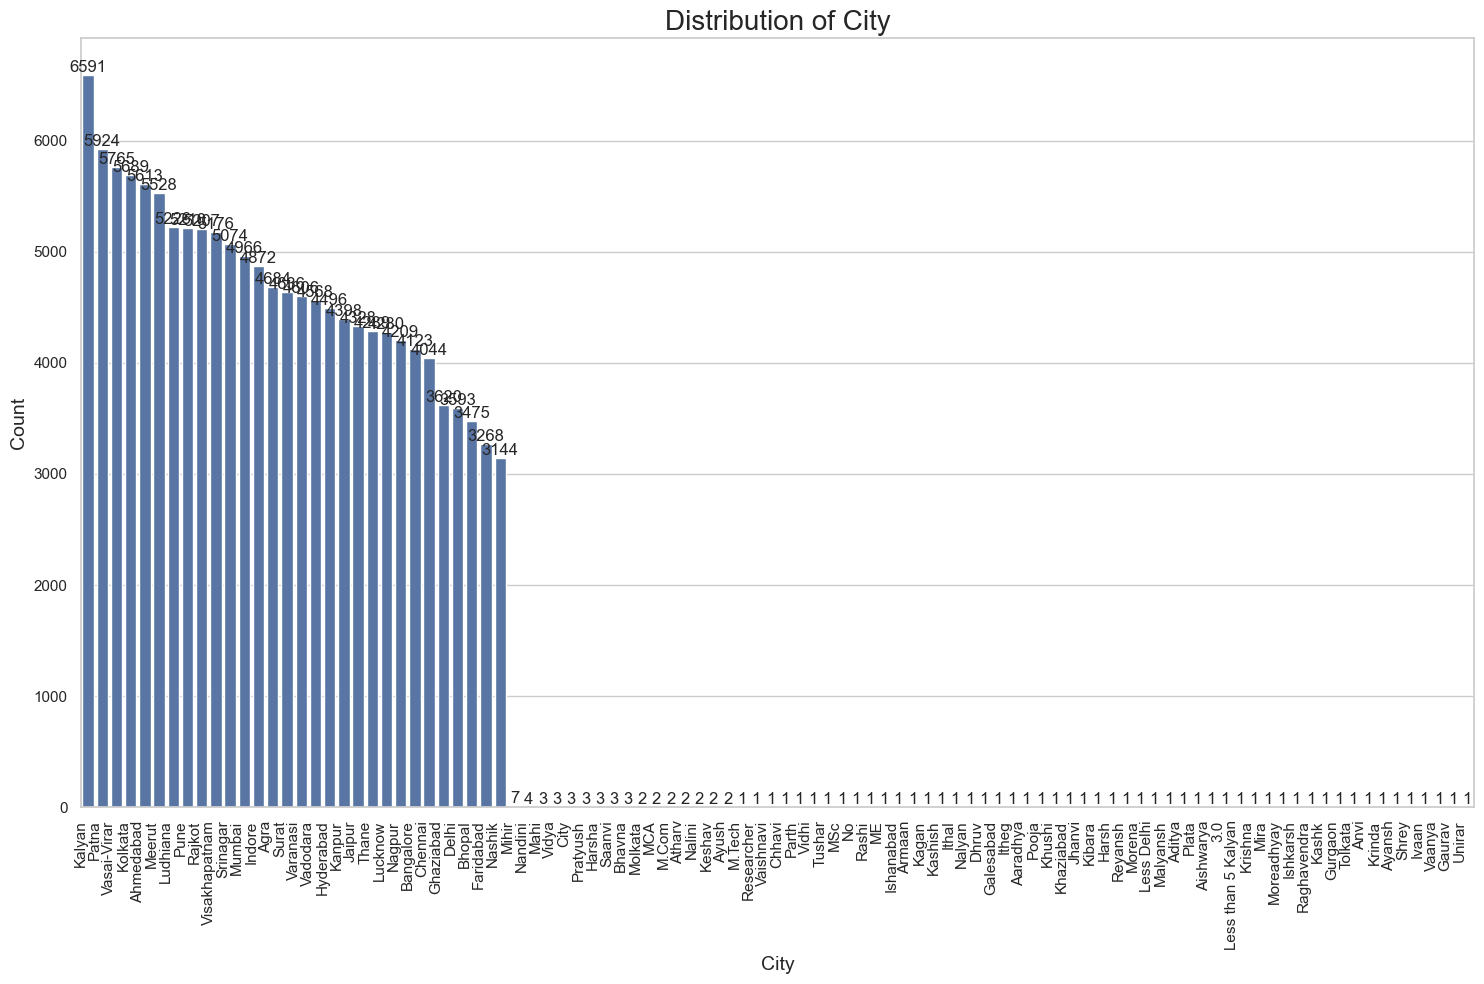

In [43]:
plot_distribution(df, 'City')

We can discard all rows with count <= 7.

In [44]:
value_counts = df['City'].value_counts()
cities_to_keep = value_counts[value_counts > 7].index
df = df[df['City'].isin(cities_to_keep)]

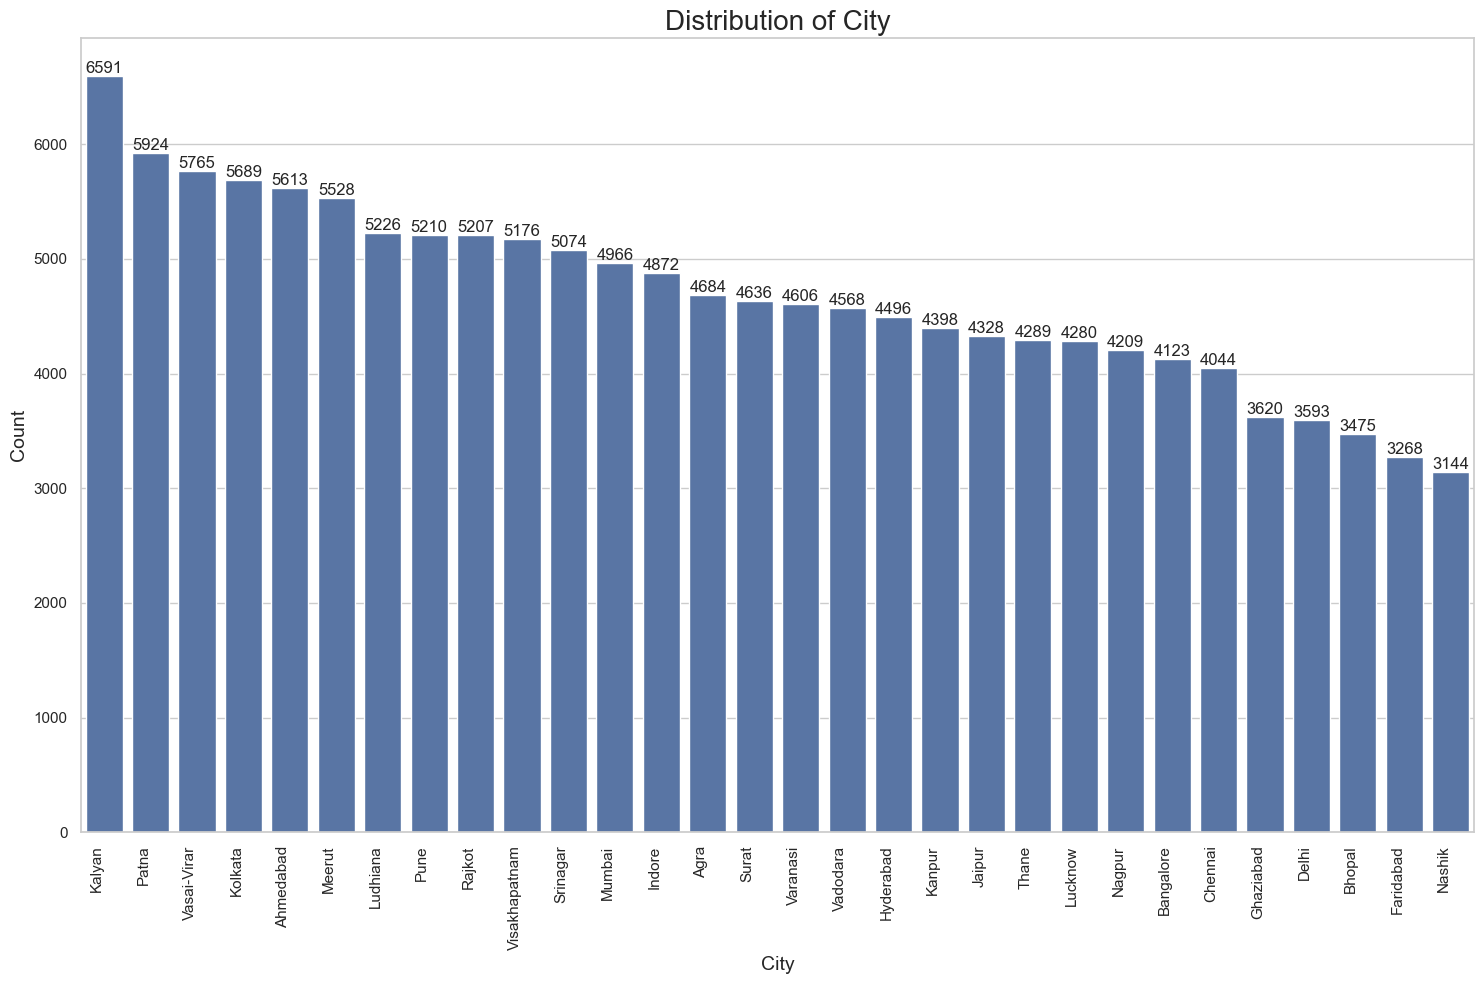

In [45]:
plot_distribution(df, 'City')

In [46]:
df['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Meerut', 'Agra', 'Surat',
       'Faridabad', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vadodara', 'Vasai-Virar', 'Delhi',
       'Bhopal', 'Indore'], dtype=object)

## Working Professional or Student

In [47]:
df['Working Professional or Student'].unique()

array(['Working Professional', 'Student'], dtype=object)

## Profession

In [48]:
df['Profession'].unique()

array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
       'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
       'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
       'HR Manager', 'UX/UI Designer', 'Content Writer',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
       'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
       'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
       'City Manager', 'BBA', 'Medical Doctor', 'Working Professional',
       'MBBS', 'Patna', 'Unveil', 'B.Ed', 'Nagpur', 'Moderate', 'M.Ed',
       'Analyst', 'Pranav', 'Visakhapatnam', 'PhD', 'Yu

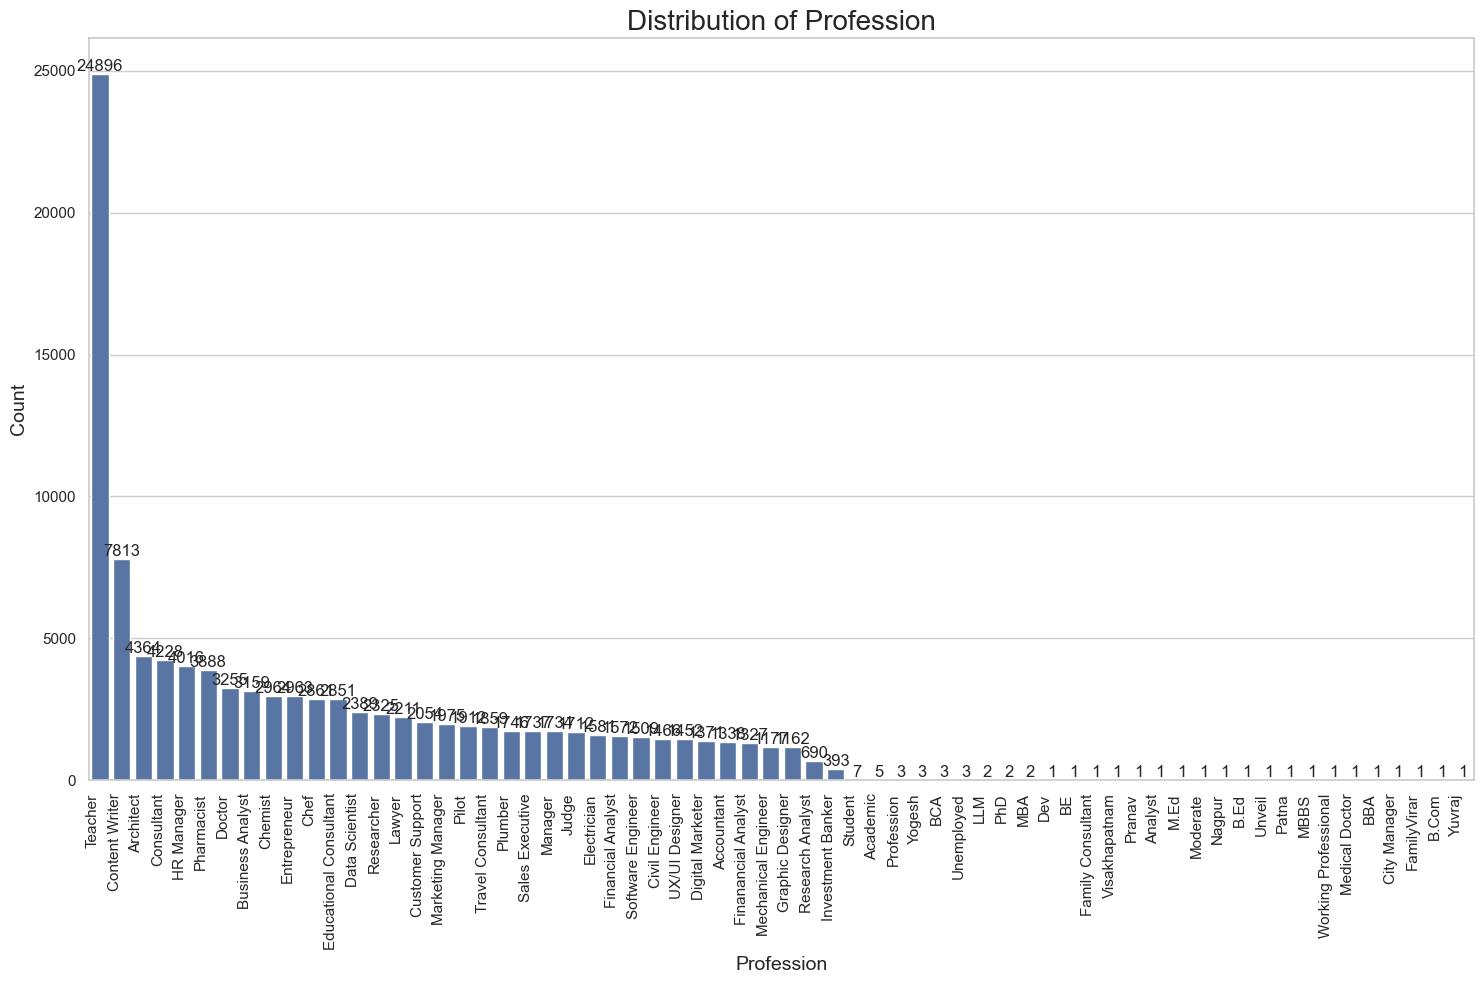

In [49]:
plot_distribution(df, 'Profession')

Again, we can discard all rows with count <= 7.

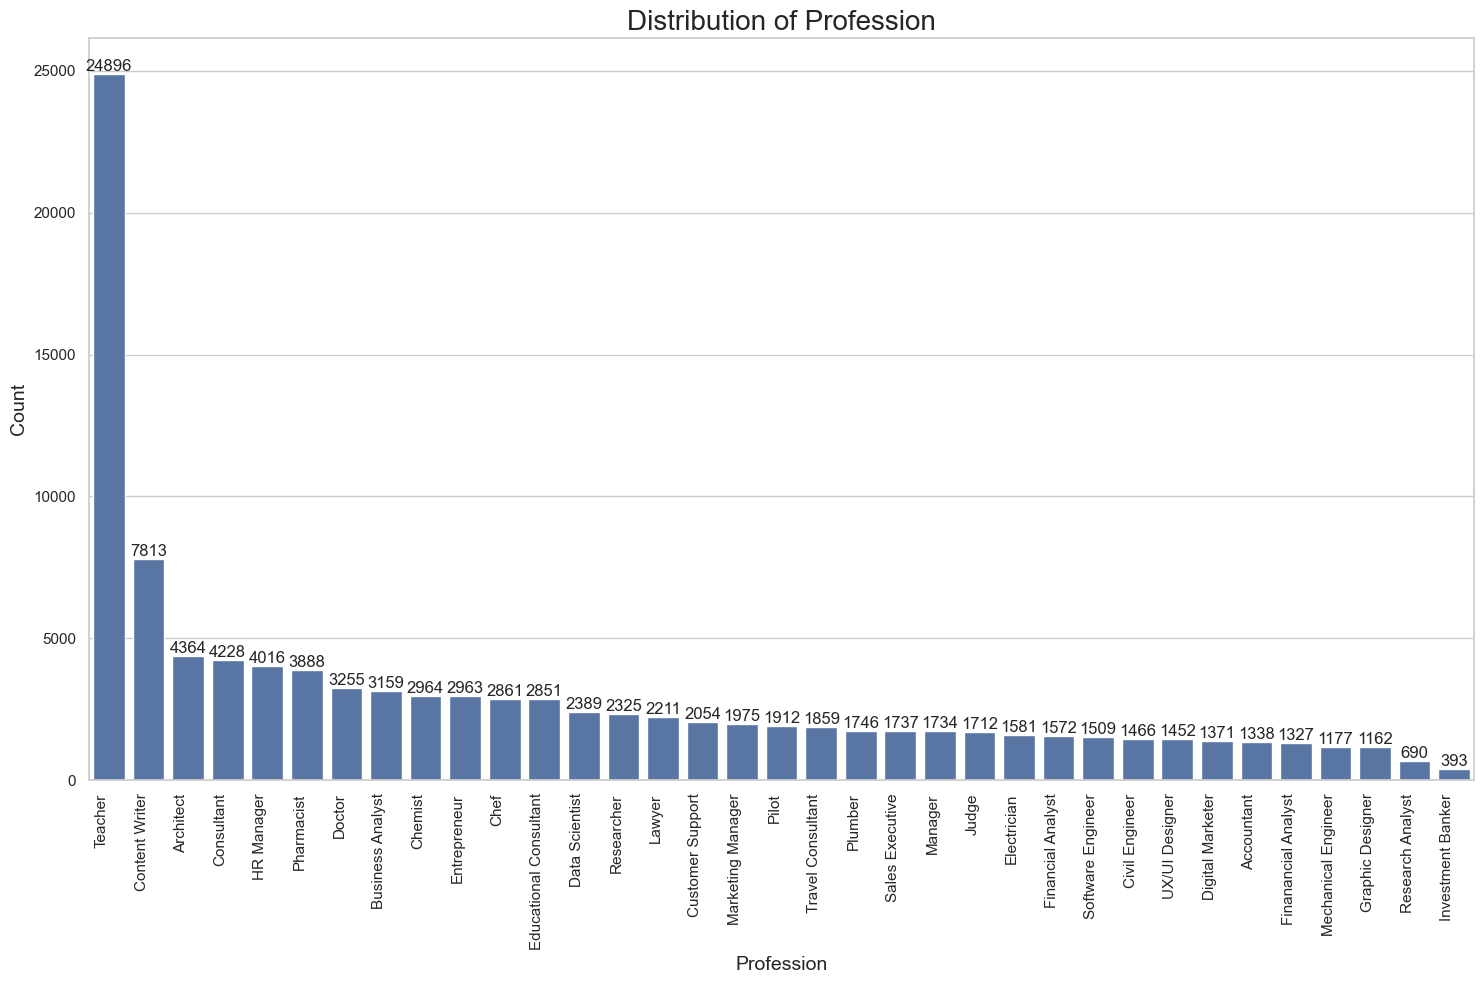

In [50]:
value_counts = df['Profession'].value_counts()
professions_to_keep = value_counts[value_counts > 7].index
df = df[df['Profession'].isin(professions_to_keep)]

plot_distribution(df, 'Profession')

## Sleep duration

In [52]:
df['Sleep Duration']

0         More than 8 hours
1         Less than 5 hours
3         Less than 5 hours
4                 5-6 hours
5                 5-6 hours
                ...        
140693    Less than 5 hours
140694    Less than 5 hours
140696            7-8 hours
140697    More than 8 hours
140698            5-6 hours
Name: Sleep Duration, Length: 103950, dtype: object

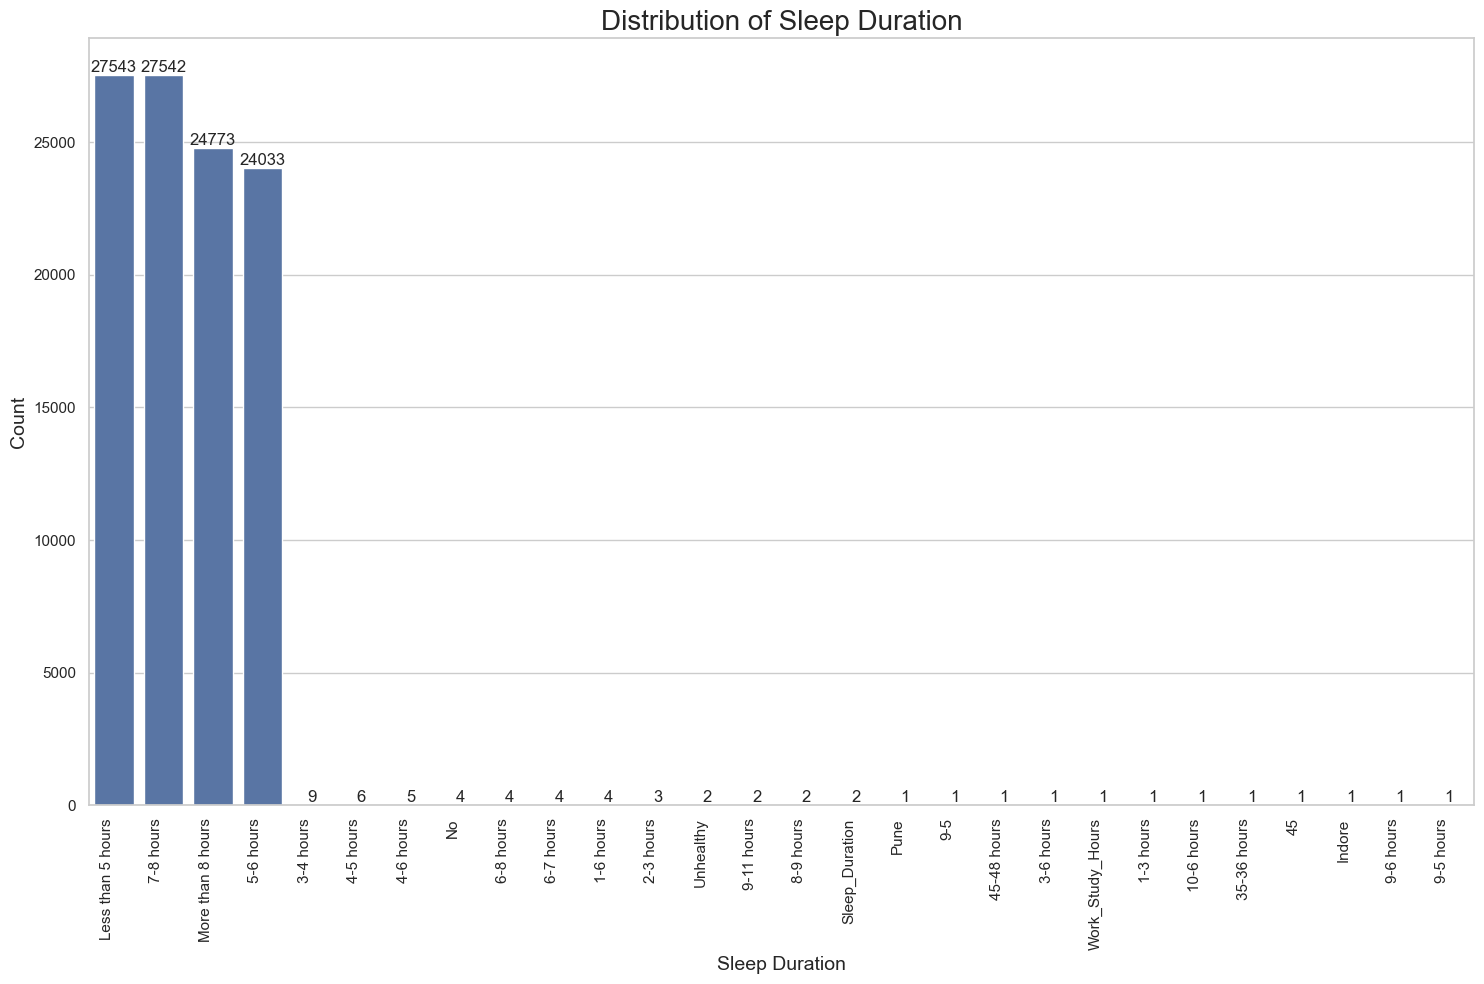

In [53]:
plot_distribution(df, 'Sleep Duration')

Again, there seems to be some data entry issues with abnormal values, we can discard them.

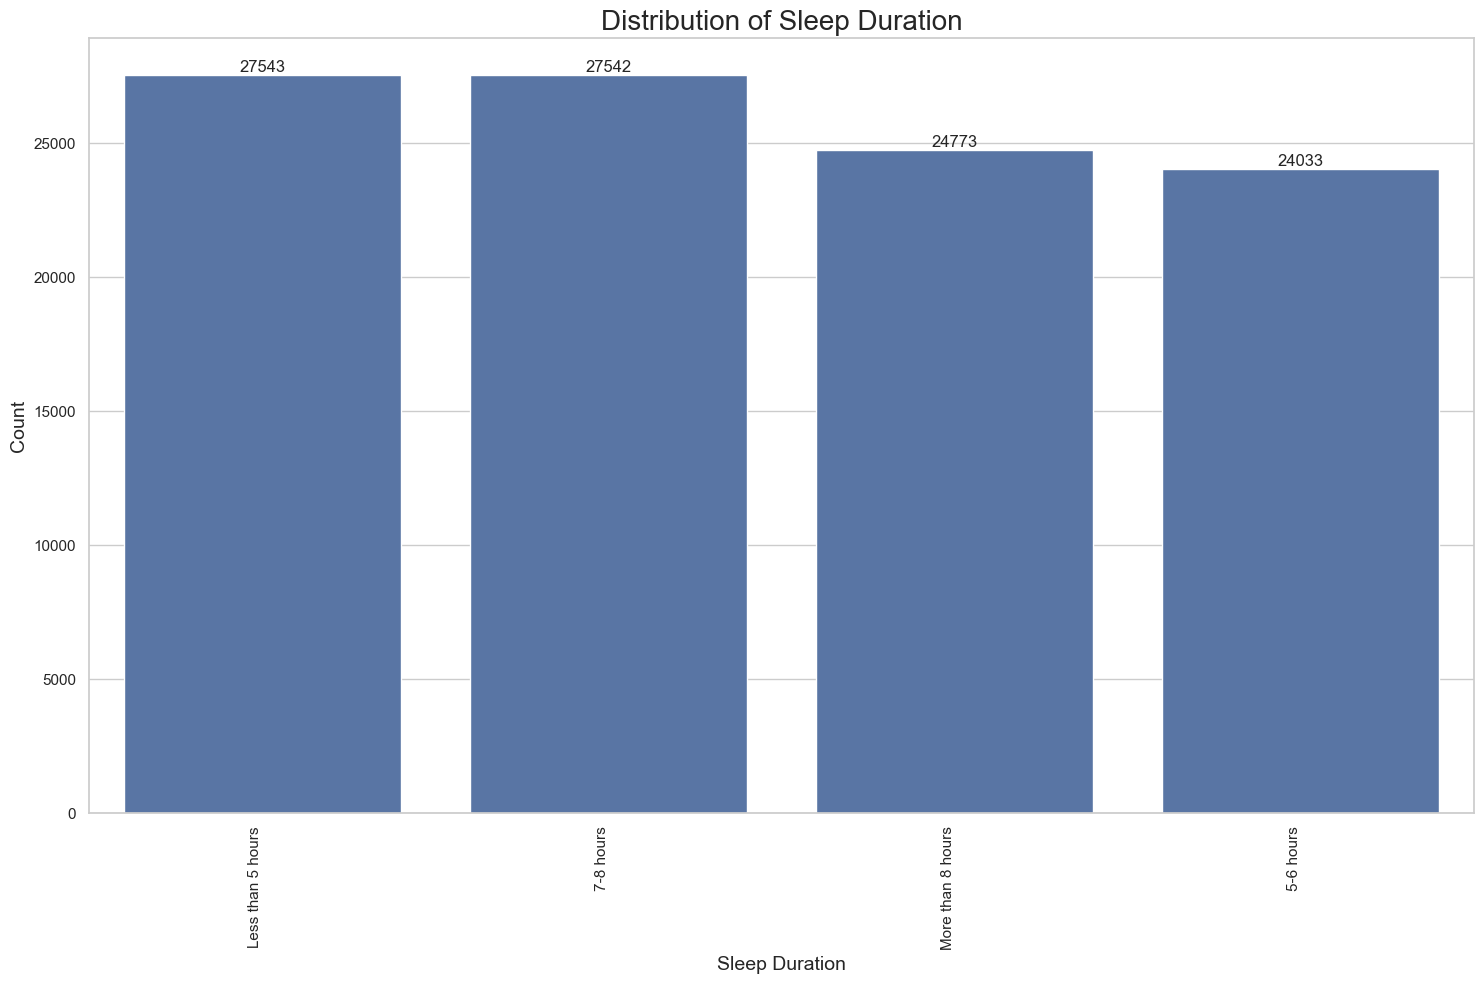

In [54]:
value_counts = df['Sleep Duration'].value_counts()
sleep_durations_to_keep = value_counts[value_counts > 9].index
df = df[df['Sleep Duration'].isin(sleep_durations_to_keep)]

plot_distribution(df, 'Sleep Duration')

## Dietary Habits

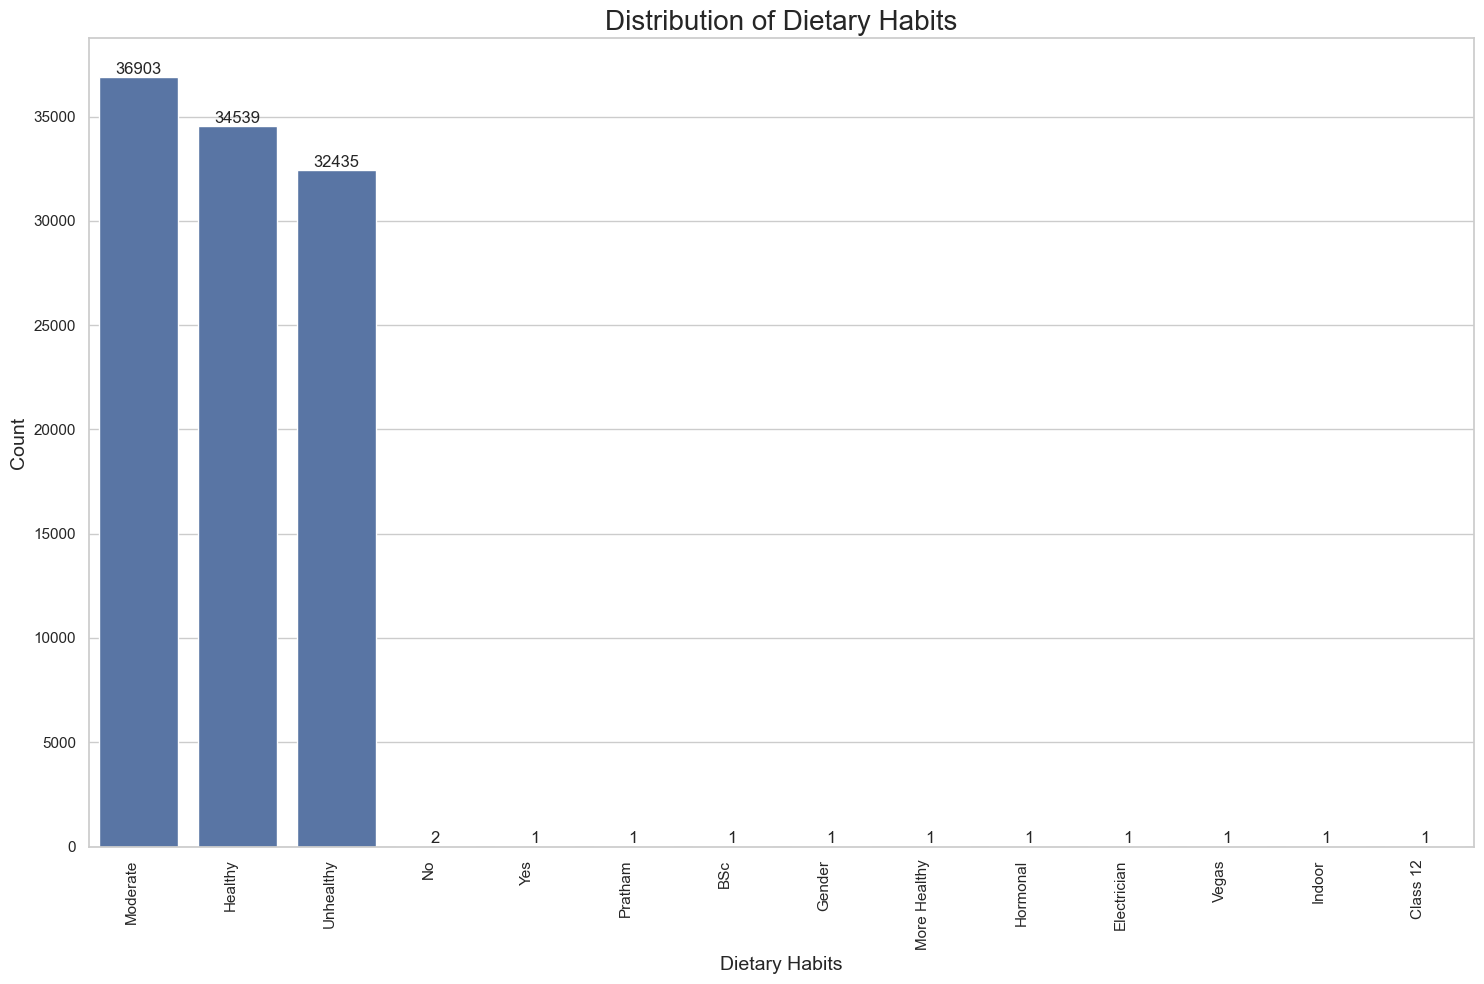

In [55]:
plot_distribution(df, 'Dietary Habits')

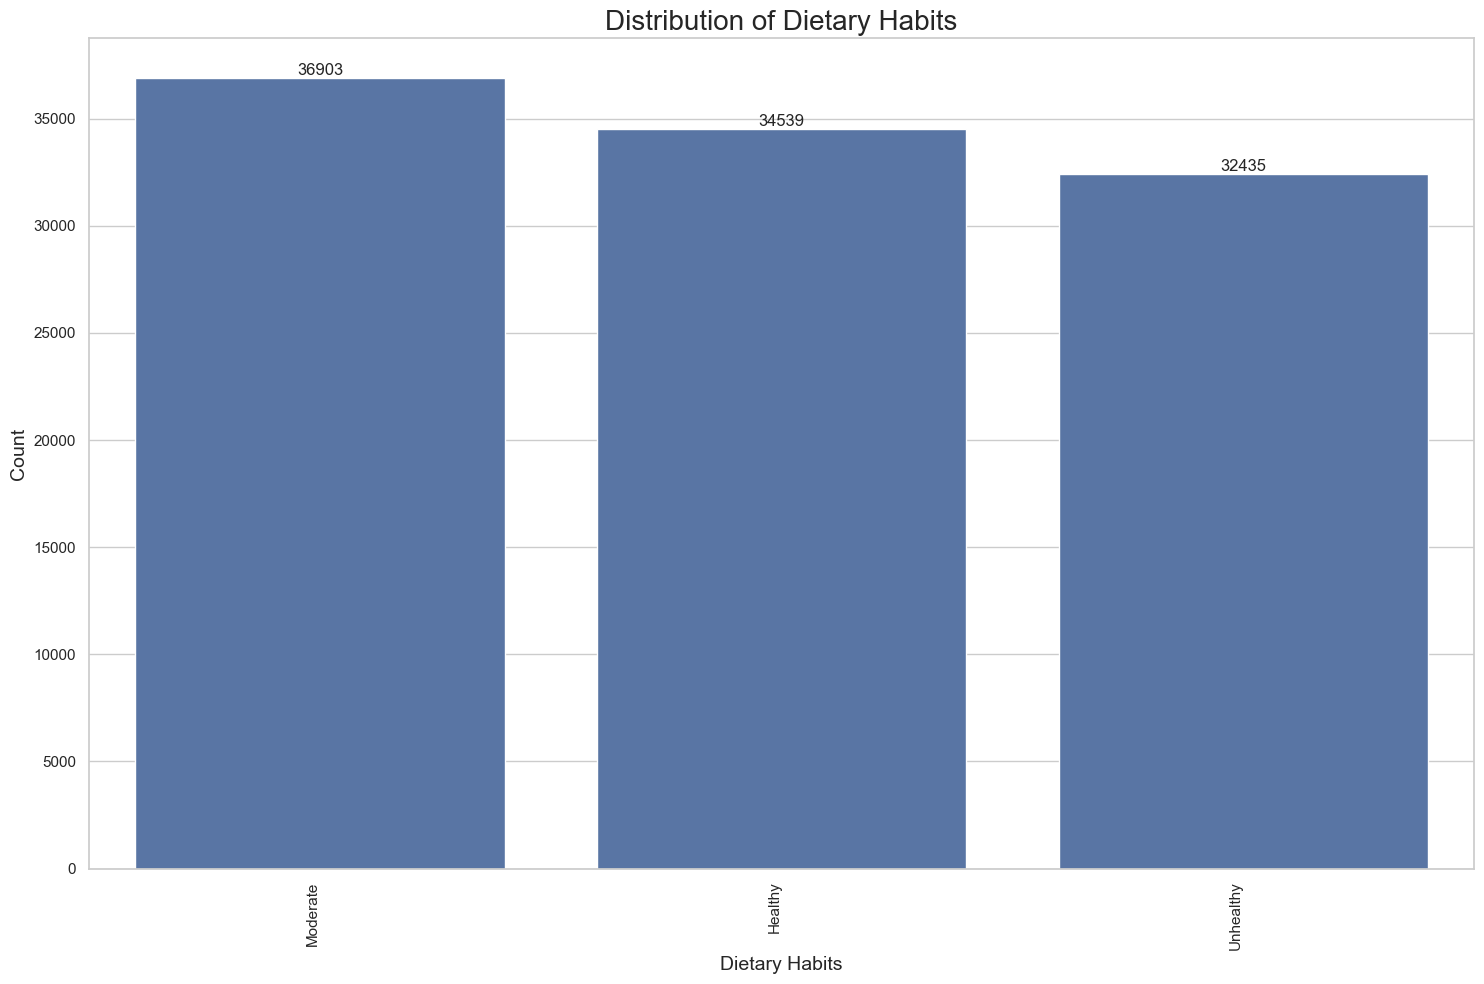

In [56]:
value_counts = df['Dietary Habits'].value_counts()
dietary_habits_to_keep = value_counts[value_counts > 2].index
df = df[df['Dietary Habits'].isin(dietary_habits_to_keep)]

plot_distribution(df, 'Dietary Habits')

## Degree

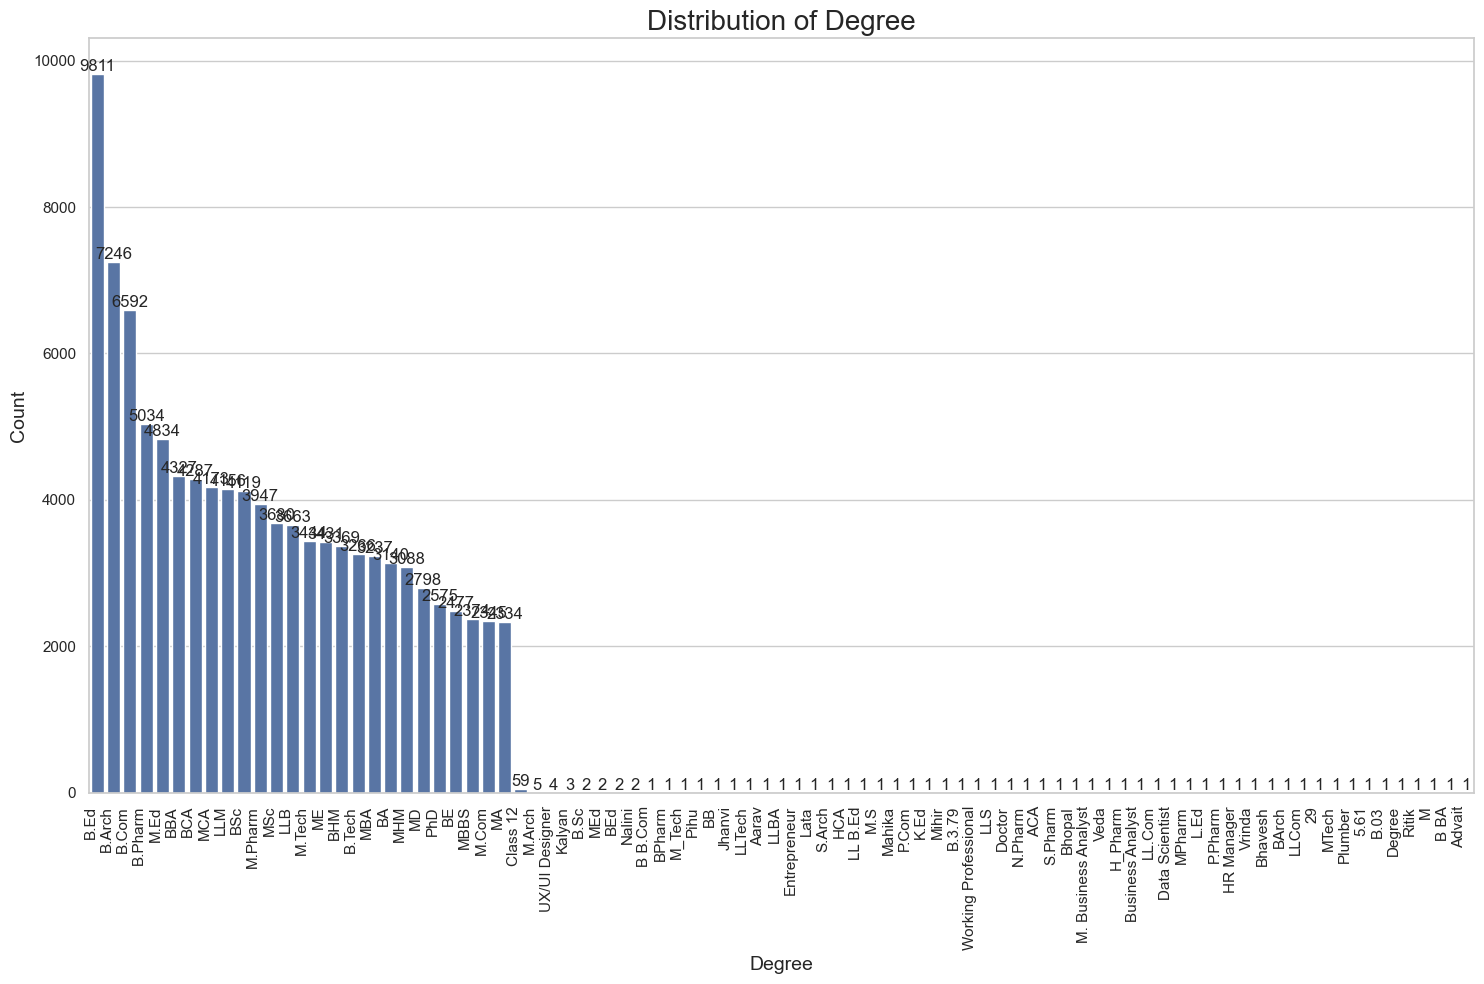

In [58]:
plot_distribution(df, 'Degree')

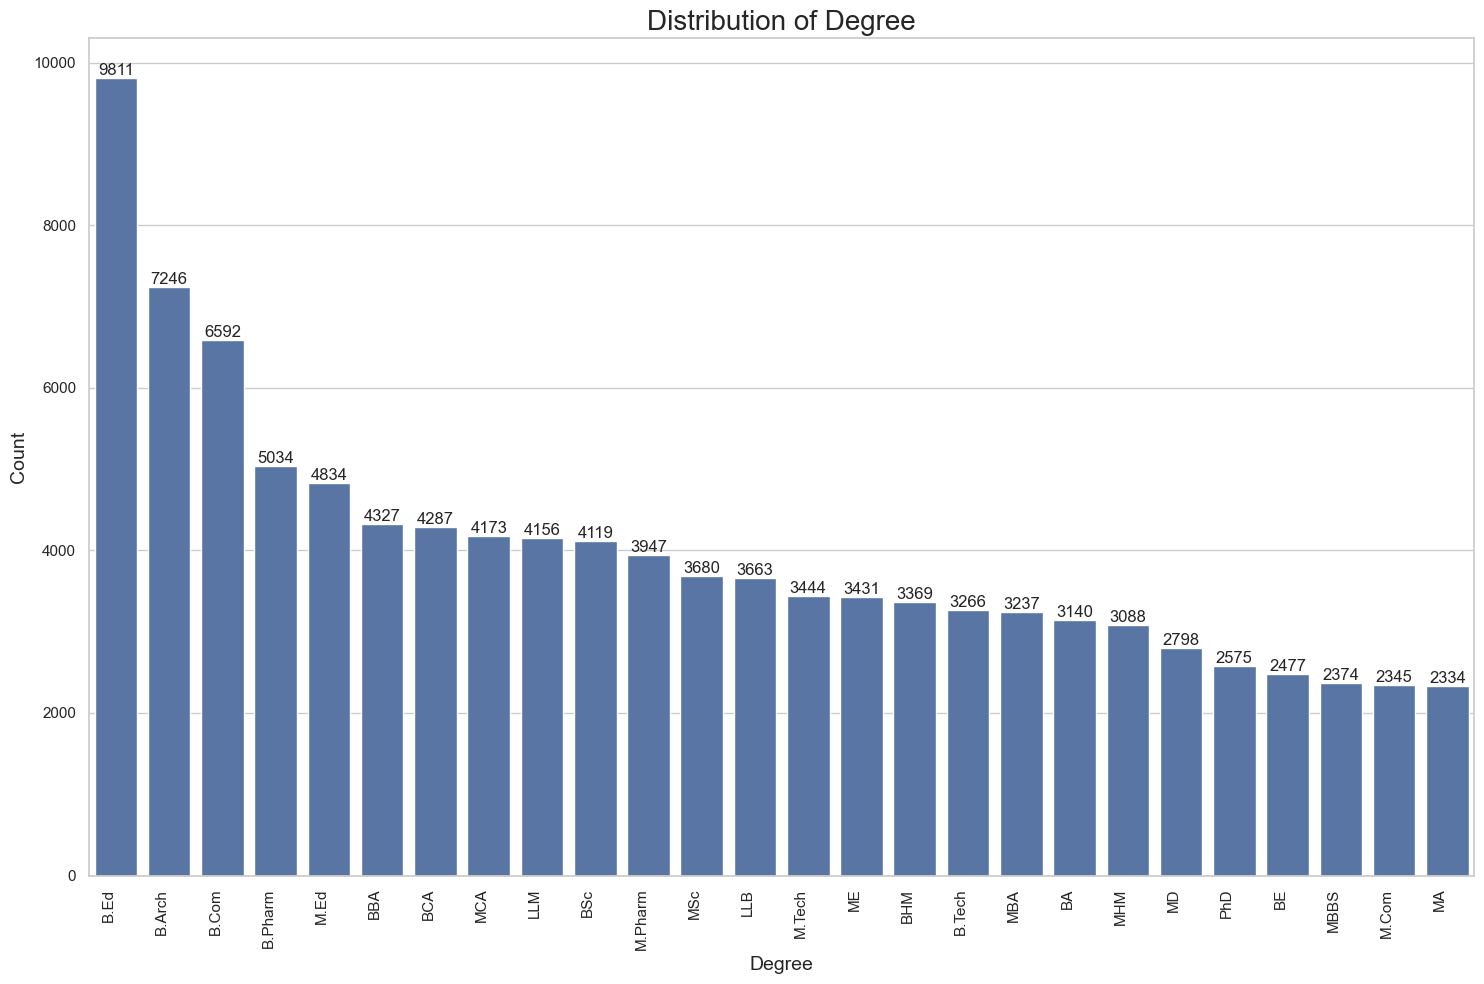

In [59]:
value_counts = df['Degree'].value_counts()
degrees_to_keep = value_counts[value_counts > 59].index
df = df[df['Degree'].isin(degrees_to_keep)]

plot_distribution(df, 'Degree')

## Have you ever had suicidal thoughts ?

In [62]:
df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

## Family History of Mental Illness

In [63]:
df['Family History of Mental Illness'].unique()

array(['No', 'Yes'], dtype=object)

# Check for missing values

In [66]:
df[categorical_cols].isnull().sum()

Name                                     0
Gender                                   0
City                                     0
Working Professional or Student          0
Profession                               0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Family History of Mental Illness         0
dtype: int64

In [67]:
df[numerical_cols].isnull().sum()

Academic Pressure     103715
Age                        0
CGPA                  103715
Financial Stress           0
Job Satisfaction          32
Study Satisfaction    103715
Work Pressure             33
Work/Study Hours           0
dtype: int64

In [72]:
(103715 / df.shape[0]) * 100

99.96915573462366

Notice that the columns Academic Pressure, CGPA, Study Satisfaction are missing an equal amount of data, which according to above, is 99.97% of the data. So we can just drop these columns as they are not useful.

In [ ]:
cols_to_remove = ['Academic Pressure', 'CGPA', 'Study Satisfaction']
df = df.drop(cols_to_remove, axis=1)
numerical_cols = list(set(numerical_cols) - set(cols_to_remove))

In [79]:
df[numerical_cols].isnull().sum()

Work/Study Hours     0
Job Satisfaction    32
Work Pressure       33
Age                  0
Financial Stress     0
dtype: int64

In [83]:
(32 / df.shape[0]) * 100

0.030844265376348233

For Job Satisfaction and Work Pressure columns, they also amount to a very small percentage of the data. So we can just drop them as they are not useful.

In [84]:
cols_to_remove = ['Job Satisfaction', 'Work Pressure']
df = df.drop(cols_to_remove, axis=1)
numerical_cols = list(set(numerical_cols) - set(cols_to_remove))
df[numerical_cols].isnull().sum()

Work/Study Hours    0
Financial Stress    0
Age                 0
dtype: int64

In [90]:
df.to_csv('data/train-clean.csv', index=False)